# Sample Keyword Analysis For Shane Co.

We are using an ETL process to extract keyword trend data using a Google API, transform these data into a dataframe, and load these values for bulk analysis. This system speeds up the process of keyword research and keyword audit.

**Extract**: 

* keywords that drive high traffic volume to www.shaneco.com are collected into a .csv file. This information can be gathered from any SEO tools such as ubersuggest, SEMRush, Ahref, etc.
* the .csv file with all the targeted keywords is imported via Python.

**Transform**:

* Pytrends, a Python package, is an "unofficial" API for Google Trends. This package automate downloading of reports from Google Trends. 
* Pulls historical trend data for all targeted keywords in the .csv file.
* Transform this data into a dataframe, giving a new .csv file output of keywords trend over a given period of time.

**Load**: 

* output .csv file of keywords trend is used for bulk keyword analysis and visualization

## Import Package

In [25]:
# API set up and essential packages
from pytrends.request import TrendReq
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
startTime = time.time()
pytrend = TrendReq(hl='en-GB', tz=360)

## Data Import and Data Extract

In [26]:
colnames = ["keywords"]
df = pd.read_csv("pytrend_input_keyword_trends.csv", names=colnames)
df2 = df["keywords"].values.tolist()
df2.remove("Keywords")

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2019-09-01 2021-01-01',
     geo='GB')
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

result = pd.concat(dataset, axis=1)
result.to_csv('pytrend_output_search_trends.csv')

executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))

Execution time in sec.: 19.569884061813354


## Pytrend_Output Data Import

In [31]:
trend_df = pd.read_csv('pytrend_output_search_trends.csv')
x = trend_df.copy()
data = trend_df.set_index(['date'])
trend_df.head(10)

,date,affordable engagement rings,diamond pendant,diamonds direct,diamonds for sale,earring jackets,engagement ring styles,engagement rings,engagement rings for women,infinity engagement ring,...,sapphire and diamond ring,sapphire bracelet,sapphire earring,sapphire rings,types of engagement rings,vintage wedding bands,wedding ring design,wedding ring designer,wedding ring styles,white gold engagement rings
0,2019-09-01,0,29,35,15,0,0,61,17,0,...,20,38,0,86,0,100,36,0,0,63
1,2019-09-08,0,15,35,45,55,0,59,100,0,...,40,38,0,51,0,0,0,0,0,63
2,2019-09-15,0,29,35,61,0,39,68,34,0,...,40,0,0,46,0,100,0,27,0,38
3,2019-09-22,0,21,34,58,0,0,46,0,0,...,0,18,0,49,0,0,34,26,0,72
4,2019-09-29,0,21,0,15,0,0,65,49,0,...,78,0,0,50,41,0,0,0,0,25
5,2019-10-06,0,21,34,29,0,0,61,16,0,...,10,0,53,49,0,0,0,0,0,72
6,2019-10-13,51,49,34,29,0,0,58,16,0,...,10,18,54,60,0,0,0,0,0,60
7,2019-10-20,0,48,100,29,52,37,61,16,0,...,19,36,0,54,0,0,0,0,0,83
8,2019-10-27,51,42,0,14,0,0,52,0,51,...,10,0,0,49,0,0,34,0,51,60
9,2019-11-03,100,27,66,57,0,37,72,31,0,...,19,18,0,69,39,0,100,0,99,59


## Data Visualization

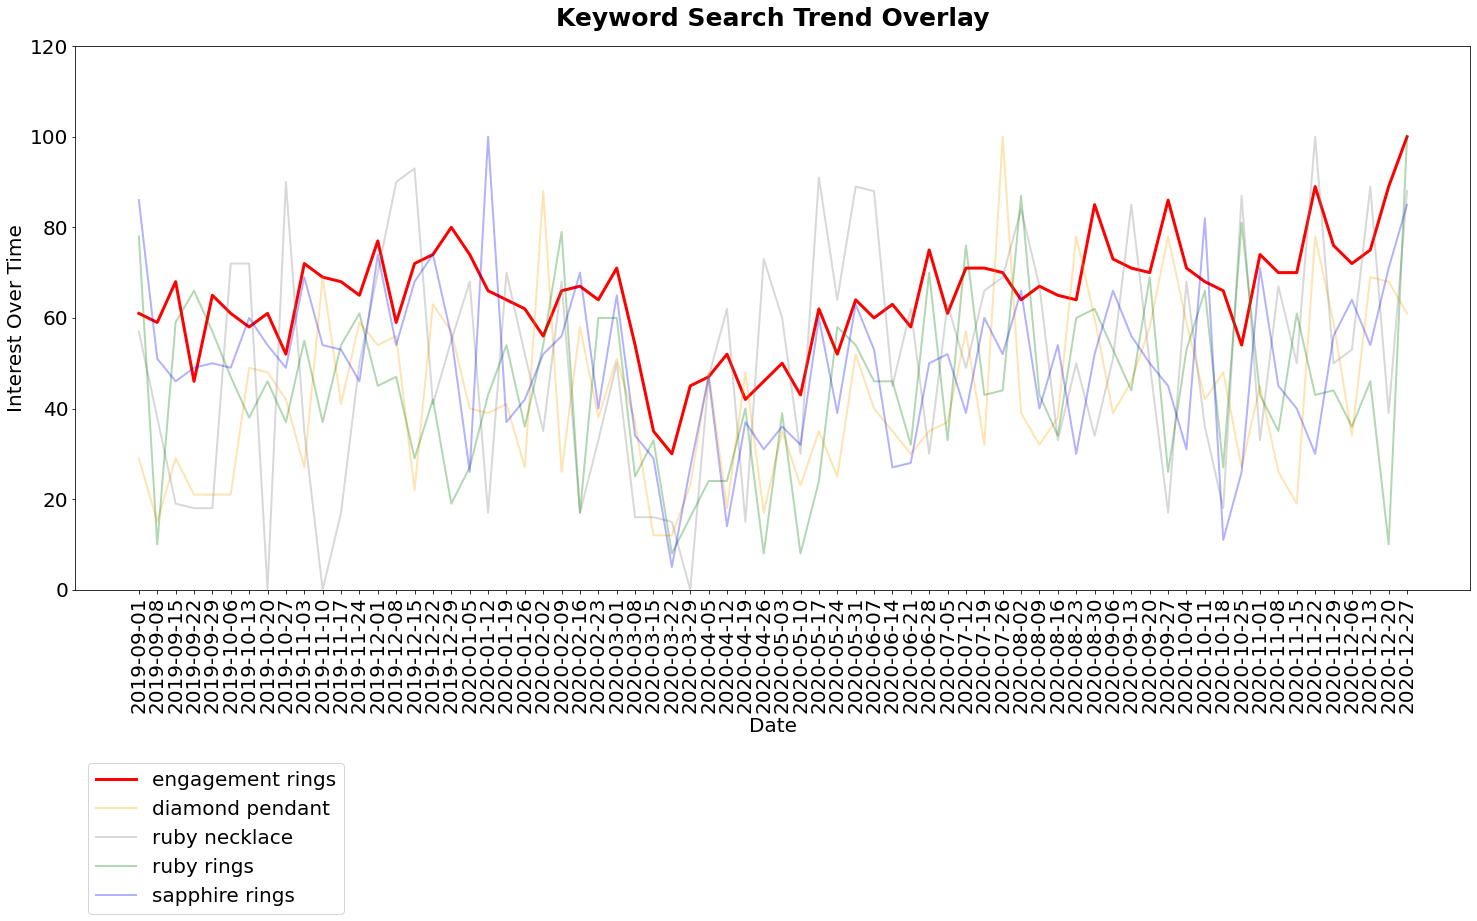

In [97]:
# define axis for keywrods with sufficient data points
x_axis = trend_df['date']
y1 = trend_df['diamond pendant']
y2 = trend_df['diamonds for sale']
y3 = trend_df['engagement rings']
y4 = trend_df['engagement rings for women']
y5 = trend_df['ring styles']
y6 = trend_df['rose gold engagement rings']
y7 = trend_df['ruby necklace']
y8 = trend_df['ruby rings']
y9 = trend_df['sapphire and diamond ring']
y10 = trend_df['sapphire bracelet']
y11 = trend_df['sapphire rings']
y12 = trend_df['white gold engagement rings']
y13 = trend_df['engagement ring styles']

# initiate the plot
plt.plot(x_axis, y3, label = 'engagement rings', linewidth=3, color='red')
plt.plot(x_axis, y1, label = 'diamond pendant', linewidth=2, color='orange', alpha=0.3)
#plt.plot(x_axis, y2, label = 'diamonds for sale', linewidth=2)
#plt.plot(x_axis, y4, label = 'engagement rings for women', linewidth=2)
#plt.plot(x_axis, y5, label = 'ring styles', linewidth=2)
#plt.plot(x_axis, y6, label = 'rose gold engagement rings', linewidth=2)
plt.plot(x_axis, y7, label = 'ruby necklace', linewidth=2, color='gray', alpha=0.3)
plt.plot(x_axis, y8, label = 'ruby rings', linewidth=2, color='green', alpha=0.3)
#plt.plot(x_axis, y9, label = 'sapphire and diamond ring', linewidth=2)
#plt.plot(x_axis, y10, label = 'sapphire bracelet', linewidth=2)
plt.plot(x_axis, y11, label = 'sapphire rings', linewidth=2, color='blue', alpha=0.3)
#plt.plot(x_axis, y12, label = 'white gold engagement rings', linewidth=2)
#plt.plot(x_axis, y13, label = 'engagement ring styles', linewidth=2)

# plot legend, labels, parameters
plt.legend(fontsize=20, bbox_to_anchor=(0.2, -0.3))
plt.xlabel('Date', fontsize=20)
plt.ylabel('Interest Over Time', fontsize=20)
plt.ylim(0, 120)
plt.title('Keyword Search Trend Overlay', fontsize=25, fontweight='bold', pad=20)
plt.xticks(x_axis, rotation =90, fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams['figure.figsize'] = [25,10]

plt.savefig("Keyword Search Trend Overlay", dpi=400, bbox_inches="tight")
plt.show()


## Results

Ruby Necklace, Sapphire Rings, and Ruby Rings are the keywords that Shane Co. highly ranked for. These keywords are also affected in terms of lowering of demand (search interest) on Google Trend.

Amongst other, these three keywords are determined to be most affected because they drive high traffic volume to the website and search trends for these were significantly lowered during the same period.

# Competitor Insight

## Data Import

In [29]:
competitor_df = pd.read_csv('competitor_analysis.csv')
x = competitor_df.copy()
data = competitor_df.set_index(['date'])
competitor_df.head()

,date,shane co,kay jewelers,zales jewlers
0,12/1/19,66,62,77
1,12/8/19,82,77,85
2,12/15/19,79,96,100
3,12/22/19,84,100,90
4,12/29/19,49,55,45


## Data Visualization

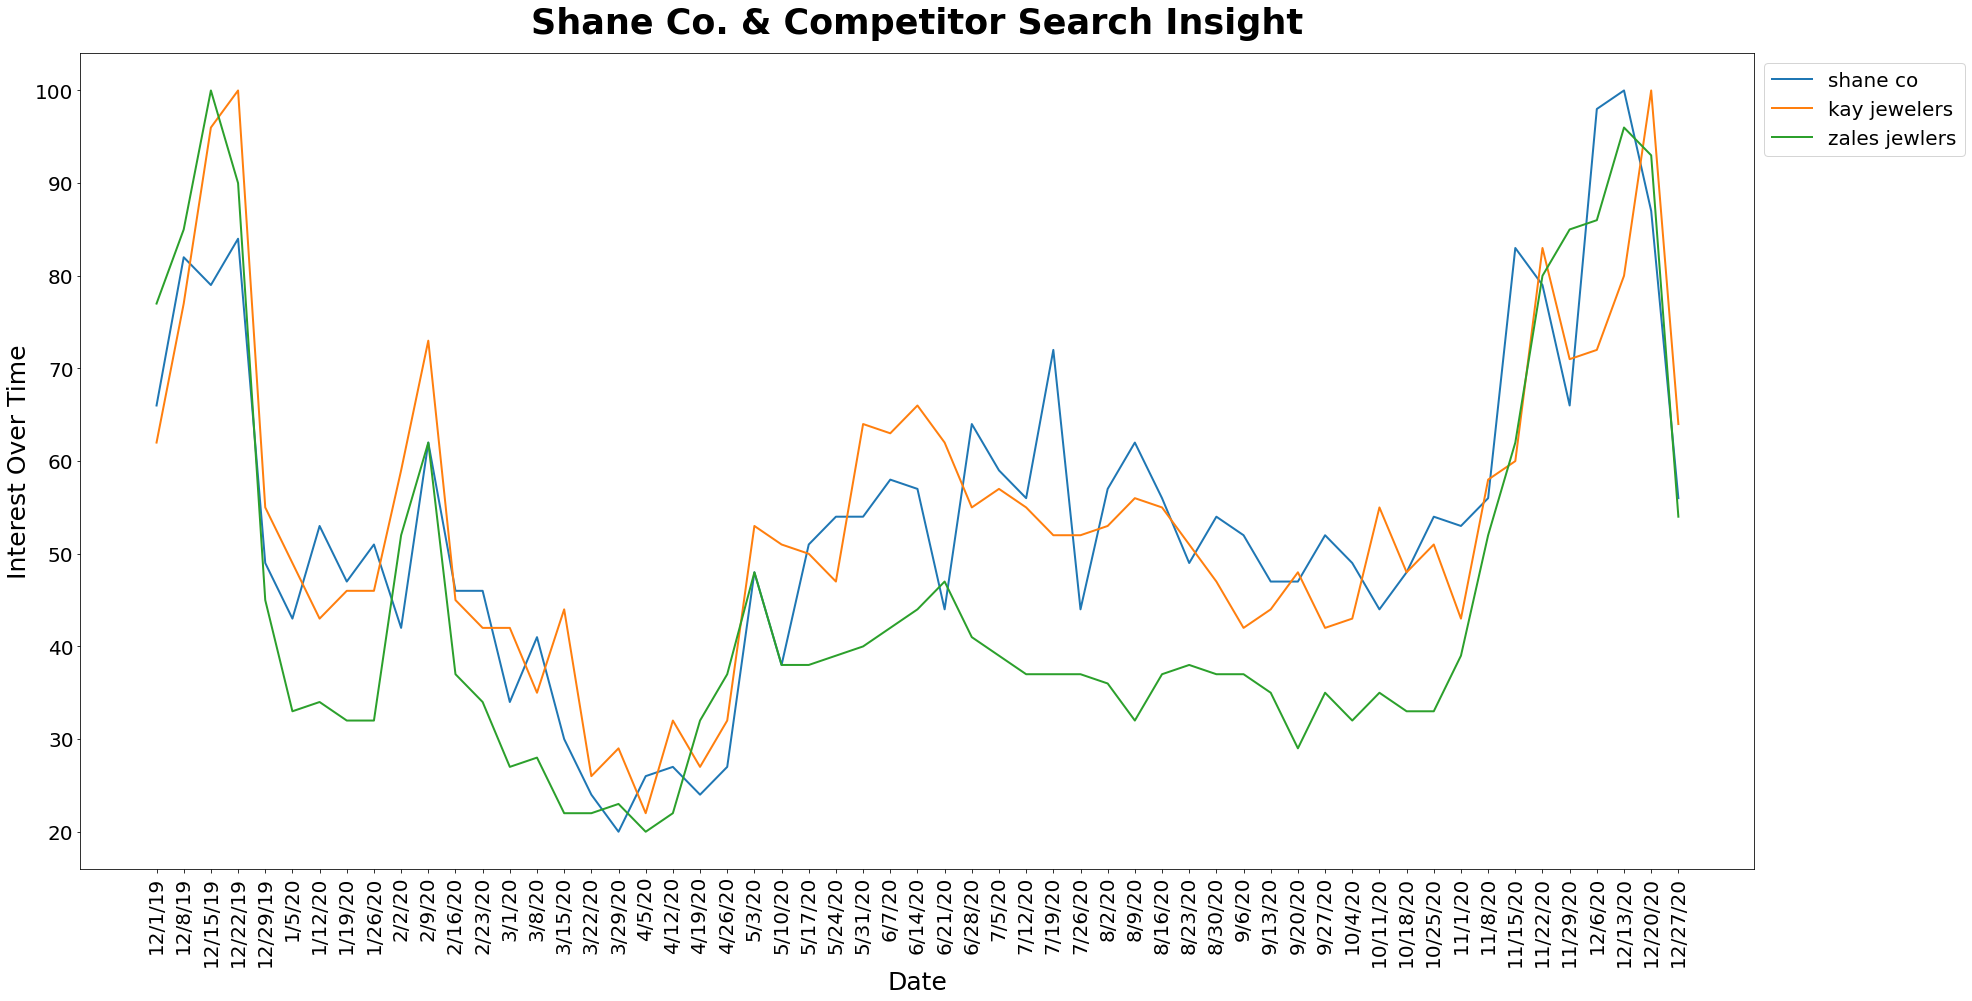

In [69]:
x_axis = competitor_df['date']
y1 = competitor_df['shane co']
y2 = competitor_df['kay jewelers']
y3 = competitor_df['zales jewlers']


plt.plot(x_axis, y1, label = 'shane co', linewidth=2)
plt.plot(x_axis, y2, label = 'kay jewelers', linewidth=2)
plt.plot(x_axis, y3, label = 'zales jewlers', linewidth=2)


plt.legend(fontsize=20, bbox_to_anchor=(1, 1.0))
plt.xticks(x_axis, rotation =90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Interest Over Time', fontsize=25)
plt.title('Shane Co. & Competitor Search Insight', fontsize=35, fontweight='bold', pad=20)
plt.rcParams['figure.figsize'] = [30,15]
plt.savefig("shane_competitor_insight", dpi=400, bbox_inches="tight")
plt.show()
